In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_name = 'uncleaned_alzheimers_disease_data.csv'
df = pd.read_csv(file_name)
df


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751.0,NaN,0.0,0.0,2.0,22.927749,NaN,13.297218,6.327112,1.347214,...,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,0.0,NaN,XXXCONFID
1,4752.0,89.0,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0,XlXCONFID
2,4753.0,73.0,0.0,3.0,1.0,17.795882,0.0,19.555085,NaN,1.826335,...,0.0,0.0,7.119548,NaN,1.0,0.0,1.0,0.0,0.0,xxxconfid
3,4754.0,NaN,1.0,NaN,1.0,33.800817,1.0,12.209266,8.428001,7.435604,...,0.0,NaN,6.481226,0.0,NaN,NaN,0.0,0.0,NaN,xxxconfid
4,4755.0,89.0,0.0,0.0,0.0,20.716974,NaN,18.454356,6.310461,0.795498,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0,XXXCONFID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,6401.0,NaN,NaN,2.0,1.0,36.602102,NaN,2.040101,8.336618,7.931416,...,1.0,0.0,1.427007,0.0,0.0,0.0,1.0,0.0,1.0,xxxconfid
2252,5067.0,NaN,0.0,1.0,1.0,29.513190,1.0,6.179733,5.822988,4.029041,...,1.0,1.0,1.067218,0.0,0.0,0.0,0.0,0.0,1.0,xxxconfid
2253,6175.0,NaN,0.0,0.0,2.0,20.079092,0.0,4.304789,4.021262,3.446462,...,0.0,1.0,9.612101,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid
2254,5930.0,82.0,0.0,3.0,0.0,18.841830,0.0,2.944207,0.734029,5.882590,...,0.0,0.0,9.173499,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid


In [3]:
df.isnull().sum()

PatientID                    225
Age                          226
Gender                       225
Ethnicity                    226
EducationLevel               228
BMI                          226
Smoking                      223
AlcoholConsumption           223
PhysicalActivity             224
DietQuality                  228
SleepQuality                 227
FamilyHistoryAlzheimers      224
CardiovascularDisease        226
Diabetes                     224
Depression                   225
HeadInjury                   225
Hypertension                 224
SystolicBP                   228
DiastolicBP                  223
CholesterolTotal             228
CholesterolLDL               223
CholesterolHDL               227
CholesterolTriglycerides     226
MMSE                         222
FunctionalAssessment         227
MemoryComplaints             225
BehavioralProblems           227
ADL                          224
Confusion                    227
Disorientation               226
Personalit

In [4]:
df = df.dropna(subset=['PatientID','Diagnosis'])
print(df.isnull().sum())

PatientID                      0
Age                          179
Gender                       184
Ethnicity                    172
EducationLevel               178
BMI                          192
Smoking                      184
AlcoholConsumption           174
PhysicalActivity             176
DietQuality                  189
SleepQuality                 182
FamilyHistoryAlzheimers      179
CardiovascularDisease        173
Diabetes                     180
Depression                   184
HeadInjury                   188
Hypertension                 183
SystolicBP                   188
DiastolicBP                  185
CholesterolTotal             180
CholesterolLDL               178
CholesterolHDL               175
CholesterolTriglycerides     186
MMSE                         179
FunctionalAssessment         179
MemoryComplaints             185
BehavioralProblems           177
ADL                          183
Confusion                    188
Disorientation               175
Personalit

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1822 entries, 1 to 2255
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1822 non-null   float64
 1   Age                        1643 non-null   float64
 2   Gender                     1638 non-null   float64
 3   Ethnicity                  1650 non-null   float64
 4   EducationLevel             1644 non-null   float64
 5   BMI                        1630 non-null   float64
 6   Smoking                    1638 non-null   float64
 7   AlcoholConsumption         1648 non-null   float64
 8   PhysicalActivity           1646 non-null   float64
 9   DietQuality                1633 non-null   float64
 10  SleepQuality               1640 non-null   float64
 11  FamilyHistoryAlzheimers    1643 non-null   float64
 12  CardiovascularDisease      1649 non-null   float64
 13  Diabetes                   1642 non-null   float64
 1

In [6]:
meanColumns = [
    'Age', 'BMI', 'AlcoholConsumption', 'ADL',
    'PhysicalActivity','DietQuality','SleepQuality','CholesterolTriglycerides',
    'CholesterolHDL','CholesterolLDL','CholesterolTotal','DiastolicBP',
    'SystolicBP','MMSE'
]

for col in meanColumns:
    df.loc[:, col] = df[col].fillna(df[col].mean())

print(df.isnull().sum())
df

PatientID                      0
Age                            0
Gender                       184
Ethnicity                    172
EducationLevel               178
BMI                            0
Smoking                      184
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers      179
CardiovascularDisease        173
Diabetes                     180
Depression                   184
HeadInjury                   188
Hypertension                 183
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment         179
MemoryComplaints             185
BehavioralProblems           177
ADL                            0
Confusion                    188
Disorientation               175
Personalit

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1,4752.0,89.000000,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0,XlXCONFID
2,4753.0,73.000000,0.0,3.0,1.0,17.795882,0.0,19.555085,4.900022,1.826335,...,0.0,0.0,7.119548,NaN,1.0,0.0,1.0,0.0,0.0,xxxconfid
4,4755.0,89.000000,0.0,0.0,0.0,20.716974,NaN,18.454356,6.310461,0.795498,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0,XXXCONFID
5,4756.0,86.000000,NaN,1.0,1.0,30.626886,NaN,10.119010,4.900022,1.584922,...,0.0,0.0,9.015686,1.0,0.0,0.0,0.0,0.0,0.0,XXXCONFID
6,4757.0,68.000000,0.0,3.0,2.0,38.387622,1.0,0.646047,9.257695,5.026777,...,0.0,0.0,9.236328,0.0,0.0,0.0,0.0,1.0,0.0,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,6401.0,75.032258,NaN,2.0,1.0,36.602102,NaN,2.040101,8.336618,7.931416,...,1.0,0.0,1.427007,0.0,0.0,0.0,1.0,0.0,1.0,xxxconfid
2252,5067.0,75.032258,0.0,1.0,1.0,29.513190,1.0,6.179733,5.822988,4.029041,...,1.0,1.0,1.067218,0.0,0.0,0.0,0.0,0.0,1.0,xxxconfid
2253,6175.0,75.032258,0.0,0.0,2.0,20.079092,0.0,4.304789,4.021262,3.446462,...,0.0,1.0,9.612101,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid
2254,5930.0,82.000000,0.0,3.0,0.0,18.841830,0.0,2.944207,0.734029,5.882590,...,0.0,0.0,9.173499,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid


In [7]:
bfillColumns = [
    'Smoking','EducationLevel'
]
for col in bfillColumns:
    df.loc[:, col] = df[col].bfill()

print(df.isnull().sum())
df

PatientID                      0
Age                            0
Gender                       184
Ethnicity                    172
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers      179
CardiovascularDisease        173
Diabetes                     180
Depression                   184
HeadInjury                   188
Hypertension                 183
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment         179
MemoryComplaints             185
BehavioralProblems           177
ADL                            0
Confusion                    188
Disorientation               175
Personalit

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1,4752.0,89.000000,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0,XlXCONFID
2,4753.0,73.000000,0.0,3.0,1.0,17.795882,0.0,19.555085,4.900022,1.826335,...,0.0,0.0,7.119548,NaN,1.0,0.0,1.0,0.0,0.0,xxxconfid
4,4755.0,89.000000,0.0,0.0,0.0,20.716974,1.0,18.454356,6.310461,0.795498,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0,XXXCONFID
5,4756.0,86.000000,NaN,1.0,1.0,30.626886,1.0,10.119010,4.900022,1.584922,...,0.0,0.0,9.015686,1.0,0.0,0.0,0.0,0.0,0.0,XXXCONFID
6,4757.0,68.000000,0.0,3.0,2.0,38.387622,1.0,0.646047,9.257695,5.026777,...,0.0,0.0,9.236328,0.0,0.0,0.0,0.0,1.0,0.0,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,6401.0,75.032258,NaN,2.0,1.0,36.602102,1.0,2.040101,8.336618,7.931416,...,1.0,0.0,1.427007,0.0,0.0,0.0,1.0,0.0,1.0,xxxconfid
2252,5067.0,75.032258,0.0,1.0,1.0,29.513190,1.0,6.179733,5.822988,4.029041,...,1.0,1.0,1.067218,0.0,0.0,0.0,0.0,0.0,1.0,xxxconfid
2253,6175.0,75.032258,0.0,0.0,2.0,20.079092,0.0,4.304789,4.021262,3.446462,...,0.0,1.0,9.612101,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid
2254,5930.0,82.000000,0.0,3.0,0.0,18.841830,0.0,2.944207,0.734029,5.882590,...,0.0,0.0,9.173499,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid


In [8]:
modeColumns = [
    'Gender','Ethnicity','FamilyHistoryAlzheimers','CardiovascularDisease',
    'Diabetes','Depression','HeadInjury','Hypertension',
    'FunctionalAssessment','BehavioralProblems','MemoryComplaints','Confusion',
    'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
]

for col in modeColumns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())
df

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1,4752.0,89.000000,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0,XlXCONFID
2,4753.0,73.000000,0.0,3.0,1.0,17.795882,0.0,19.555085,4.900022,1.826335,...,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0.0,xxxconfid
4,4755.0,89.000000,0.0,0.0,0.0,20.716974,1.0,18.454356,6.310461,0.795498,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0,XXXCONFID
5,4756.0,86.000000,1.0,1.0,1.0,30.626886,1.0,10.119010,4.900022,1.584922,...,0.0,0.0,9.015686,1.0,0.0,0.0,0.0,0.0,0.0,XXXCONFID
6,4757.0,68.000000,0.0,3.0,2.0,38.387622,1.0,0.646047,9.257695,5.026777,...,0.0,0.0,9.236328,0.0,0.0,0.0,0.0,1.0,0.0,xxxconfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,6401.0,75.032258,1.0,2.0,1.0,36.602102,1.0,2.040101,8.336618,7.931416,...,1.0,0.0,1.427007,0.0,0.0,0.0,1.0,0.0,1.0,xxxconfid
2252,5067.0,75.032258,0.0,1.0,1.0,29.513190,1.0,6.179733,5.822988,4.029041,...,1.0,1.0,1.067218,0.0,0.0,0.0,0.0,0.0,1.0,xxxconfid
2253,6175.0,75.032258,0.0,0.0,2.0,20.079092,0.0,4.304789,4.021262,3.446462,...,0.0,1.0,9.612101,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid
2254,5930.0,82.000000,0.0,3.0,0.0,18.841830,0.0,2.944207,0.734029,5.882590,...,0.0,0.0,9.173499,0.0,0.0,0.0,0.0,0.0,0.0,xxxconfid


In [9]:
# Drop unnecessary columns
df = df.drop(columns=['PatientID','DoctorInCharge'])

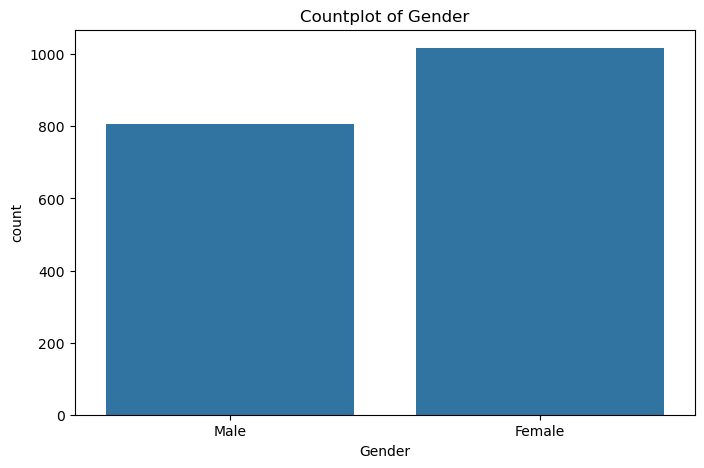

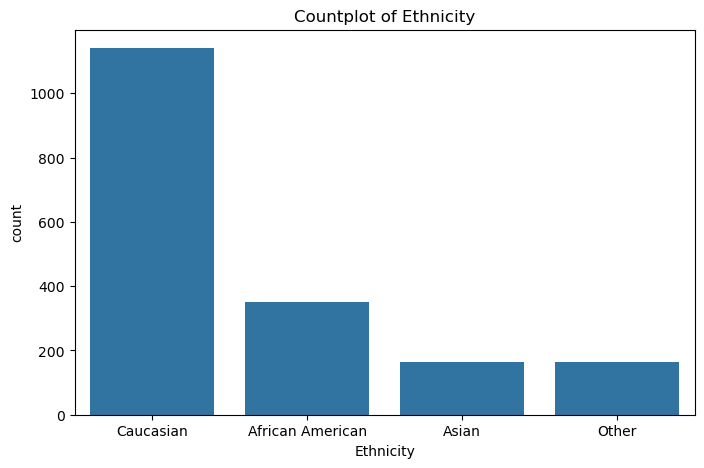

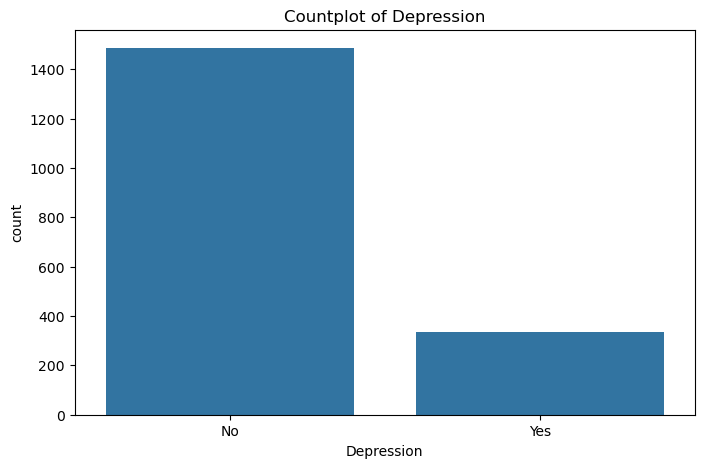

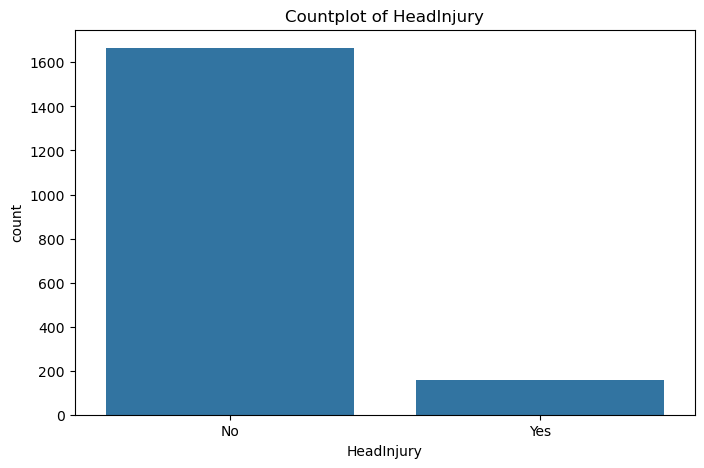

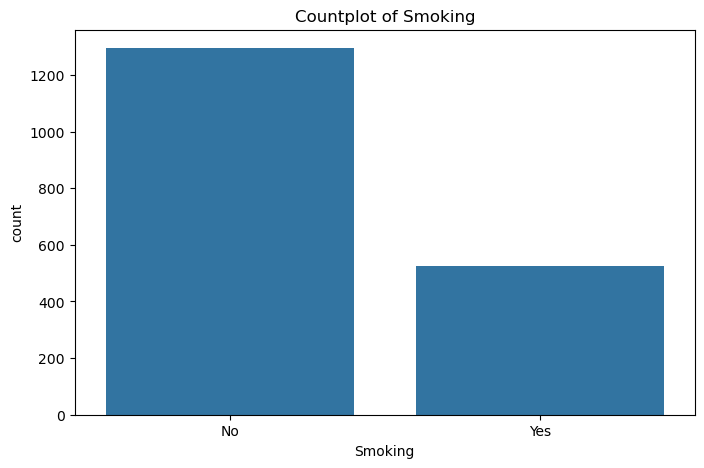

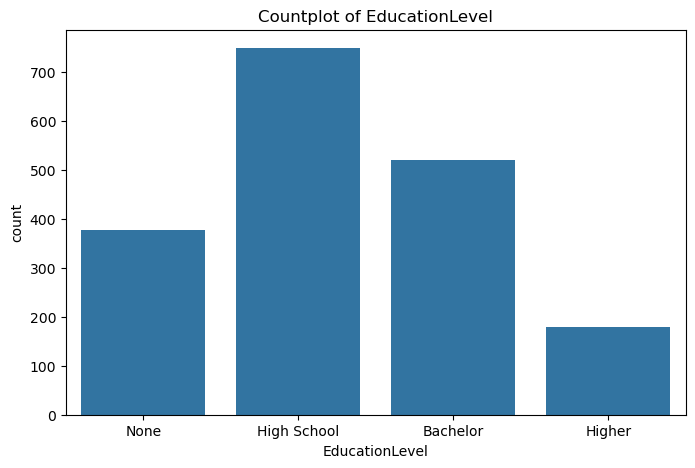

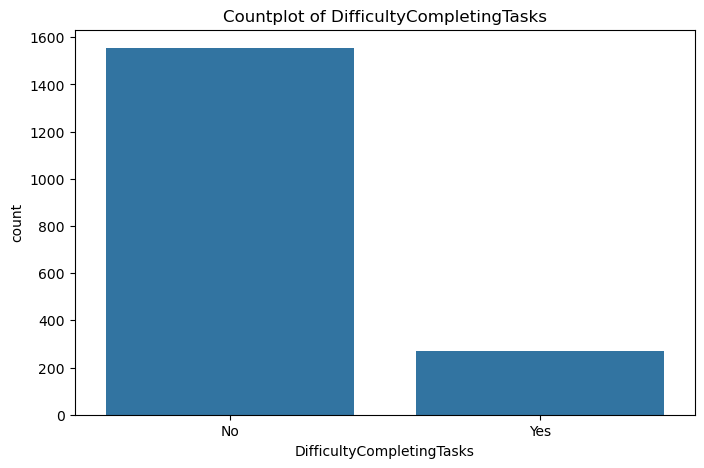

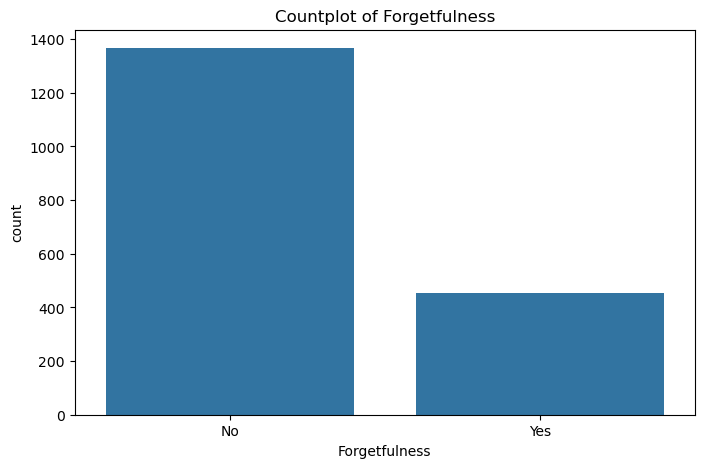

In [10]:
categorical_columns = ['Gender','Ethnicity','Depression','HeadInjury','Smoking','EducationLevel','DifficultyCompletingTasks', 'Forgetfulness']
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Smoking': ['No', 'Yes'],
    'EducationLevel': ['None', 'High School', 'Bachelor', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    plt.show()

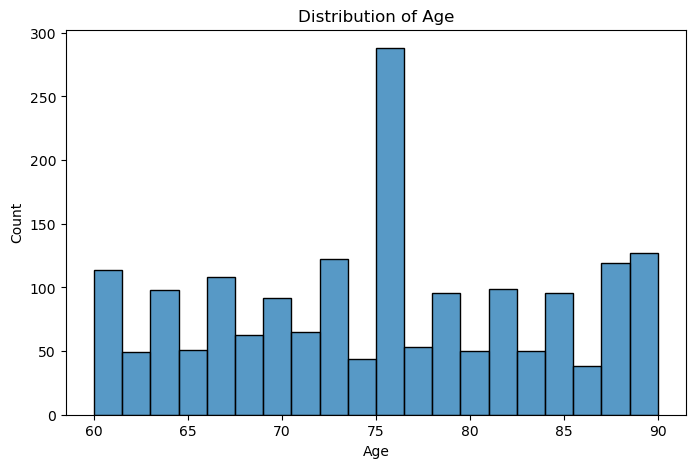

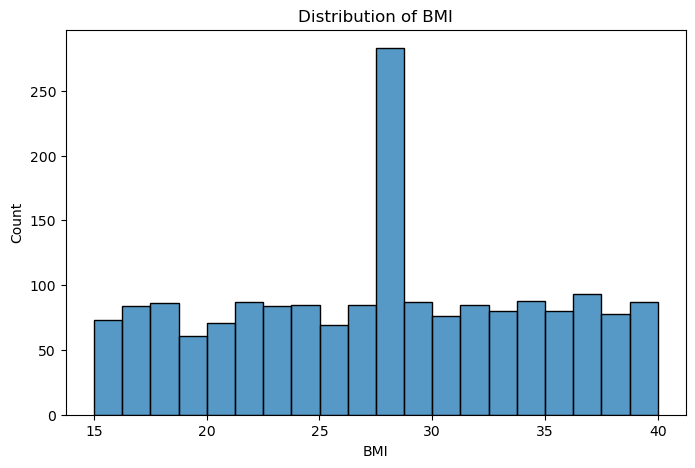

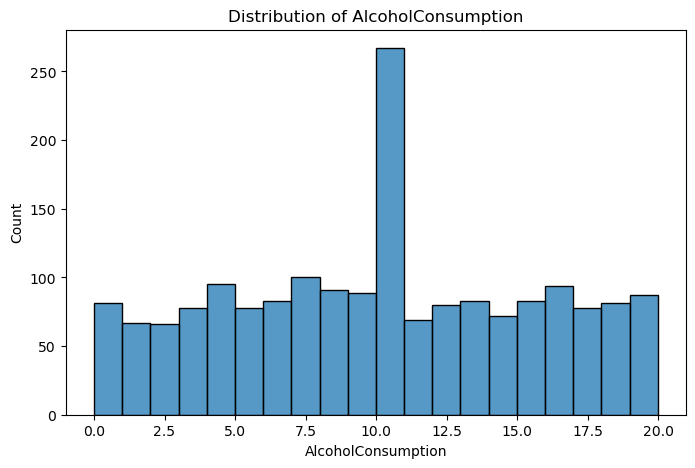

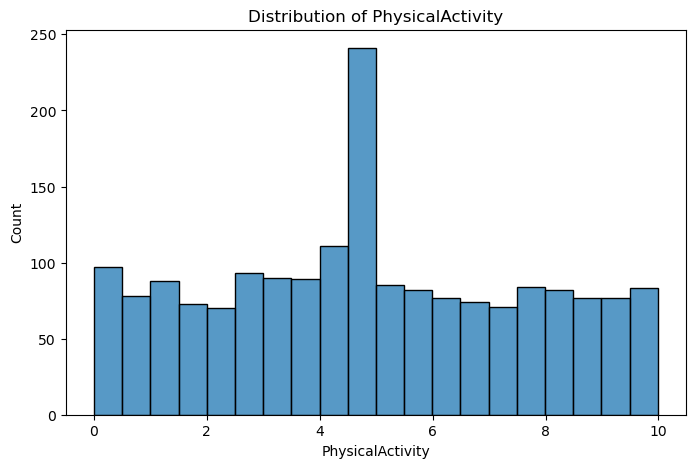

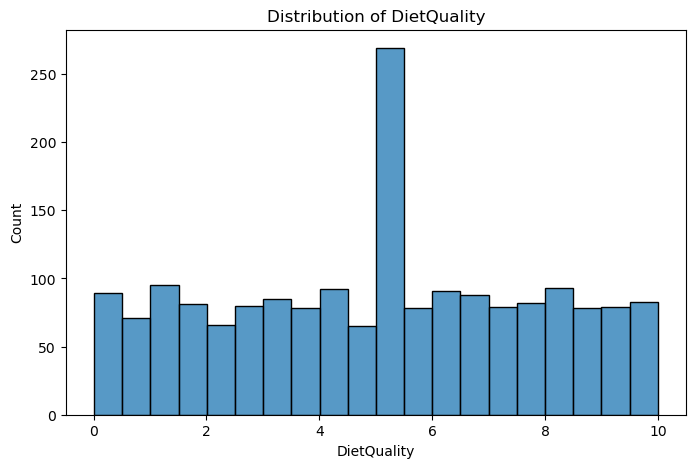

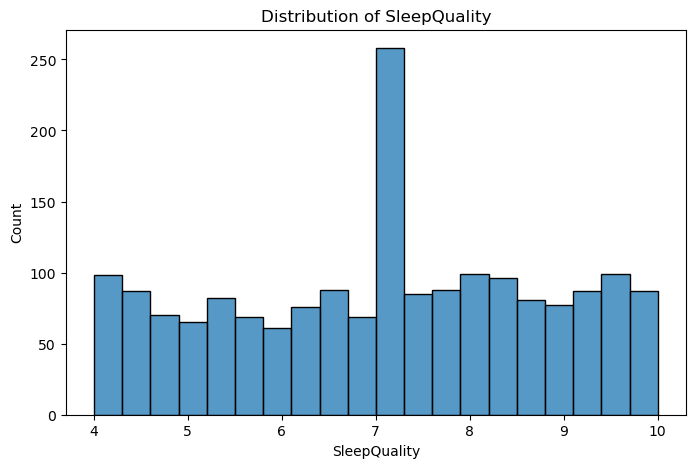

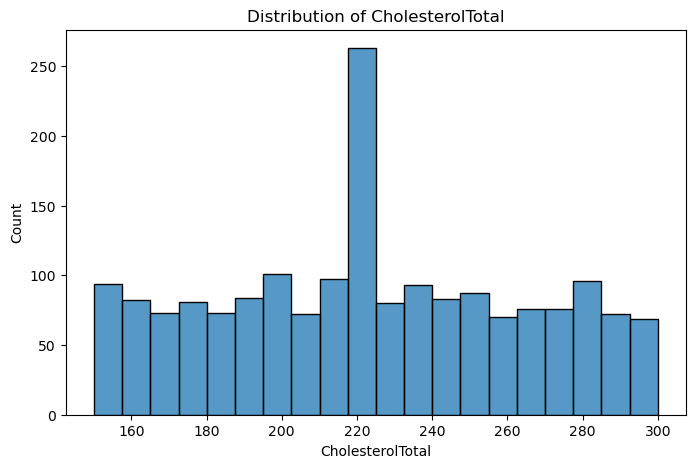

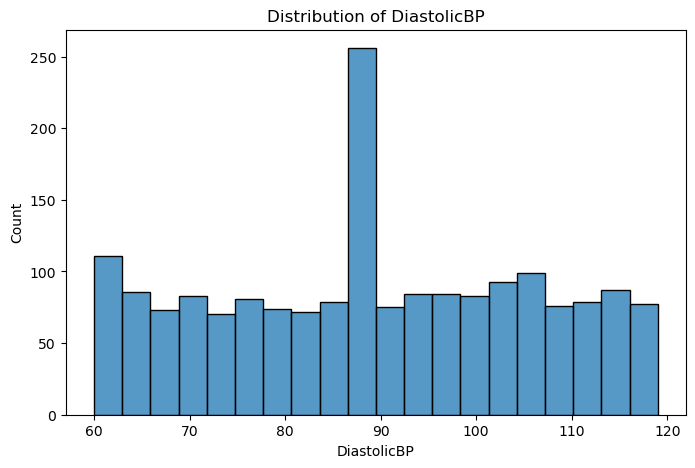

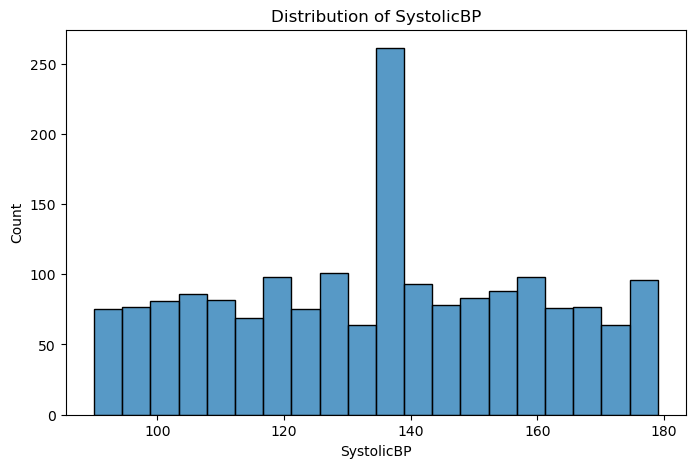

In [11]:
numerical_columns = ['Age', 'BMI', 'AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','CholesterolTotal','DiastolicBP',
    'SystolicBP']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

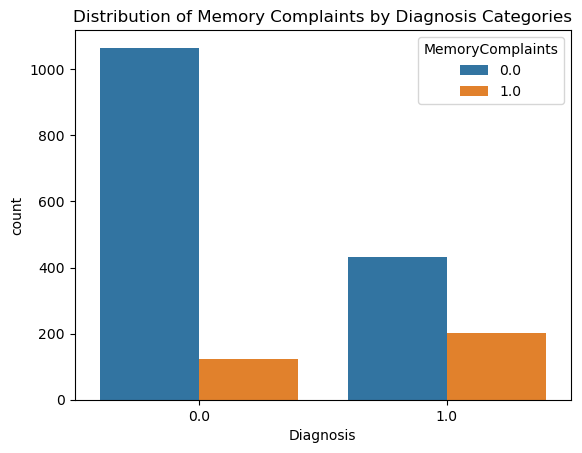

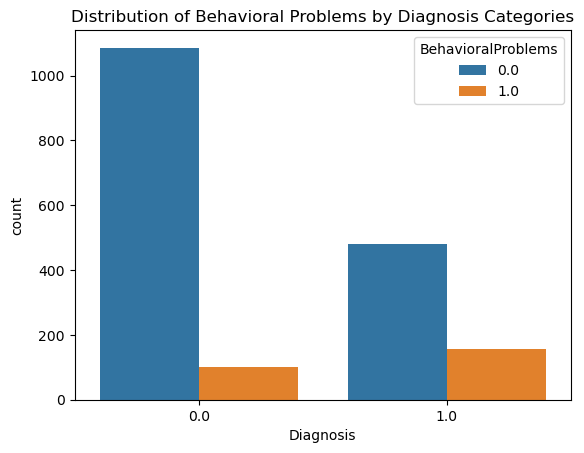

In [12]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()


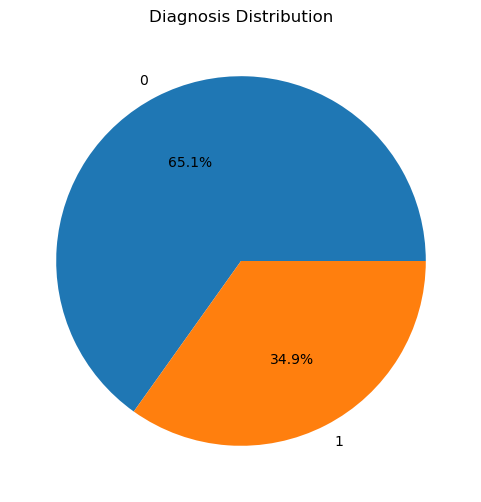

In [13]:
plt.figure(figsize=(6, 6))
plt.pie(df['Diagnosis'].value_counts(), labels=[0,1],autopct='%1.1f%%')
plt.title('Diagnosis Distribution')
plt.show()

In [14]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [15]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [16]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=60)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=60)

Accuracy Score: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       243
         1.0       0.94      0.80      0.87       122

    accuracy                           0.92       365
   macro avg       0.93      0.89      0.90       365
weighted avg       0.92      0.92      0.92       365



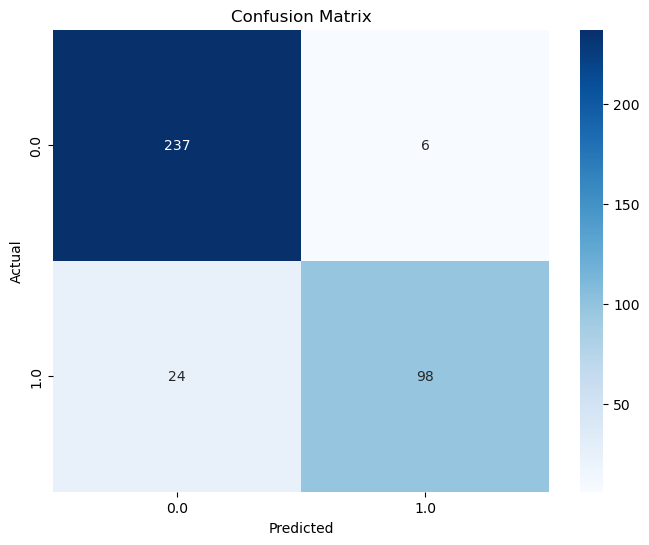

In [86]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [66]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 573.4 kB/s eta 0:03:38
   ---------------------------------------- 0.2/124.9 MB 893.0 kB/s eta 0:02:20
   ---------------------------------------- 0.2/124.9 MB 935.2 kB/s eta 0:02:14
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:56
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:46
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:35
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:30
   ---------------------------------------- 0.8/124.9 MB 1.4 MB/s eta 

In [72]:
from xgboost import XGBClassifier
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=300, random_state=60)
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=60, ...)

In [76]:
y_pred = xgb_model.predict(X_test)

Accuracy Score: 0.9260273972602739
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       243
         1.0       0.94      0.84      0.88       122

    accuracy                           0.93       365
   macro avg       0.93      0.90      0.91       365
weighted avg       0.93      0.93      0.92       365



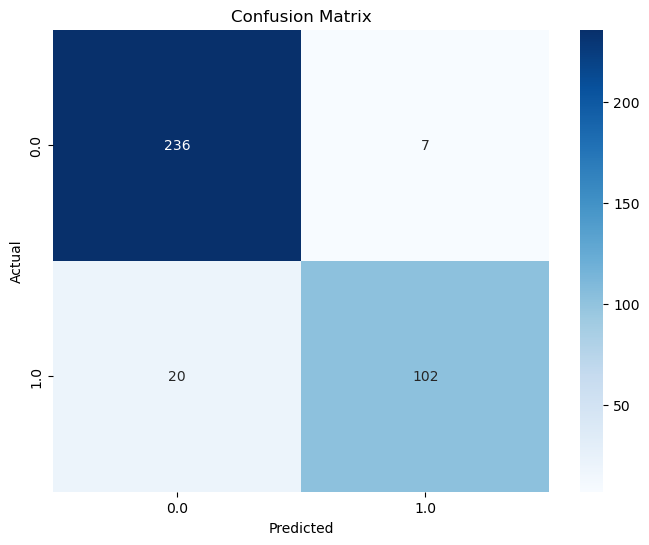

In [82]:
_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, _pred))
print("Classification Report:\n", classification_report(y_test, _pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

joblib.dump(xgb_model, 'random_forest_model.pkl')